<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
print(auto.head())
print(auto.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  
              mpg   cyl

<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [14]:
# Command(s)

auto.isnull().sum()



mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [15]:
# Command:
incomplete_rows = auto[auto.isnull().any(axis=1)]
print(incomplete_rows)
# Comment (One - two sentence)
# Missing horsepower 5 rows

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   

     origin  
32        1  
126       1  
330       2  
336       1  
354       2  


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [16]:
# Command(s):
auto2 = auto.fillna(auto.mean())
# Comment (one sentence):
#  Probably not, because horsepower is a predictor so it might bias the model. 

<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [17]:
# Develop the model 
from sklearn.linear_model import LinearRegression
feat_cols = ['cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'year', 'origin']
resp_col = 'mpg'

X = auto2[feat_cols]
y = auto2[resp_col]

r2 = []
expl_var = []
mse = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lrm = LinearRegression().fit(X_train, y_train)
    y_pred = lrm.predict(X_test)
    r2.append(r2_score(y_test, y_pred))
    expl_var.append(explained_variance_score(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    
print('mse: {}\nexpl_var: {}\nr2: {}'.format(np.mean(mse), np.mean(expl_var), np.mean(r2)))


# Comment on its quality 
# Simple, not bad, but it could be better

mse: 11.597327643849917
expl_var: 0.8129844019112995
r2: 0.8108373196657753


In [19]:
type(auto2)

pandas.core.frame.DataFrame

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

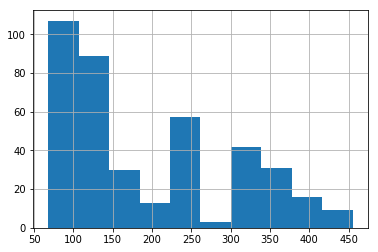

AttributeError: 'Series' object has no attribute 'reshape'

In [20]:
# Histogram of engine displacement
auto2['displacement'].hist()
plt.show()

dis = auto2['displacement'].reshape(-1, 1)
pt = PowerTransformer(method='box-cox', standardize=True)
auto2['displacement_n'] = pt.fit(dis)
# Plot histogram of this new feature to reveal normal-like distribution

auto2['displacement_n'].hist()
plt.show()

<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [ ]:
# Calculate then new model

# Comment on its performance
#

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [ ]:
# Center and scale

# Recalculate the model

# Comment on its performance
